In [98]:
import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

/kaggle/input/donostiaferie/donostiaevent_ferie_2019.numbers
/kaggle/input/donostiameteo-opinion/meteo_opinion.csv
/kaggle/input/donostia-football/DonostiaFootball.csv
/kaggle/input/ferie-donostia/feriedonostia.csv
/kaggle/input/bus-affluence/data_estia_bihar_passagers.csv


In [99]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(20, 6))

<Figure size 2000x600 with 0 Axes>

<Figure size 2000x600 with 0 Axes>

In [100]:
df = pd.read_csv('../input/bus-affluence/data_estia_bihar_passagers.csv')

In [101]:
df.head()

,dateTime,passengersNumber,line,lineType
0,2019-05-01,4172.0,5,daily
1,2019-04-06,7330.0,5,daily
2,2019-04-05,10426.0,5,daily
3,2019-04-17,9134.0,5,daily
4,2019-04-21,3608.0,5,daily


In [102]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 36901 entries, 0 to 36900
Data columns (total 4 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   dateTime          36901 non-null  object 
 1   passengersNumber  36901 non-null  float64
 2   line              36901 non-null  object 
 3   lineType          36901 non-null  object 
dtypes: float64(1), object(3)
memory usage: 1.1+ MB


In [103]:
df.describe()

,passengersNumber
count,36901.000000
mean,5585.431316
std,4032.138753
min,0.000000
25%,995.000000
50%,6735.000000
75%,9361.000000
max,15948.000000


Convertissons datetime dans le bon type

In [104]:
df["dateTime"] = pd.to_datetime(df["dateTime"])
df["dateTime"].dtypes

dtype('<M8[ns]')

## Analyse préliminaire du dataframe

Notre variable cible est la variable **'passengersNumber'**. Etudions alors son comportement:

In [105]:
df[['passengersNumber', 'lineType']].groupby('lineType').sum()

,passengersNumber
lineType,
daily,205815219.0
night,292782.0


<AxesSubplot:xlabel='lineType', ylabel='count'>

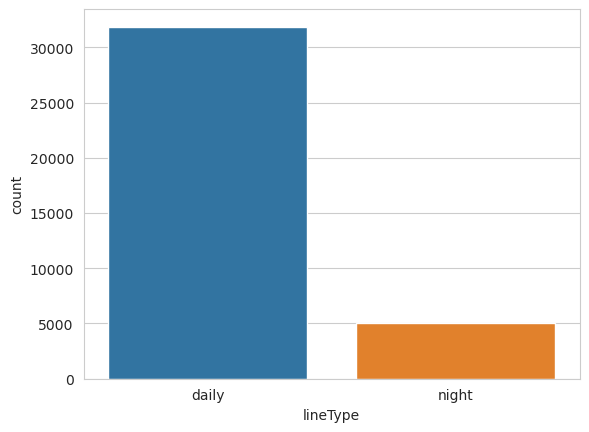

In [106]:
sns.countplot(x=df["lineType"])

Nous déduisons qu'il y a plus d'affluence les jours que les nuits

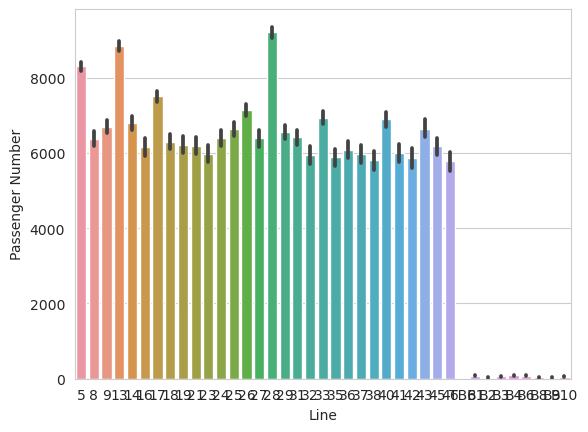

In [107]:
sns.barplot(x='line', y='passengersNumber', data=df)
plt.xlabel('Line')
plt.ylabel('Passenger Number')
plt.show()

Affichage des affluences par mois de l'année

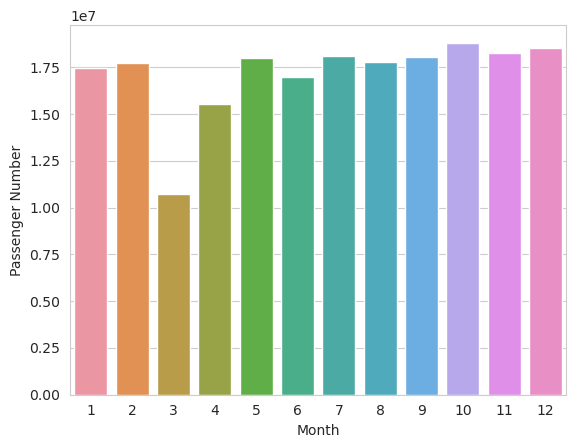

In [108]:
df['month'] = df['dateTime'].dt.month
df_monthly = df.groupby('month')['passengersNumber'].sum().reset_index()
sns.barplot(data=df_monthly, x='month', y='passengersNumber')
plt.xlabel('Month')
plt.ylabel('Passenger Number')
plt.show()

In [109]:
df['day'] = df['dateTime'].dt.day

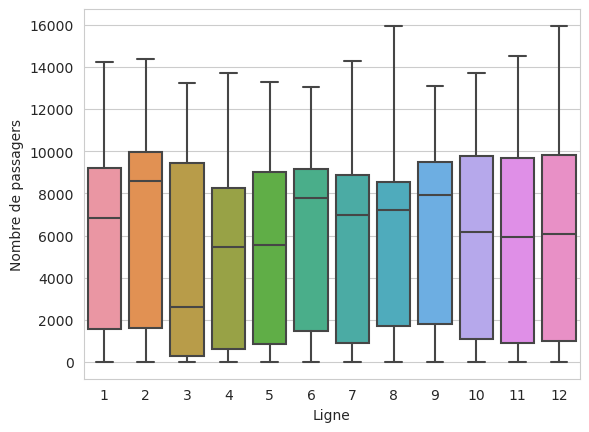

In [110]:
sns.boxplot(x='month', y='passengersNumber', data=df)
sns.set_style("whitegrid")
plt.xlabel('Ligne')
plt.ylabel('Nombre de passagers')
plt.show()

In [111]:
df['year'] = df['dateTime'].dt.year
df_yearly = df.groupby('year')['passengersNumber'].sum().reset_index()

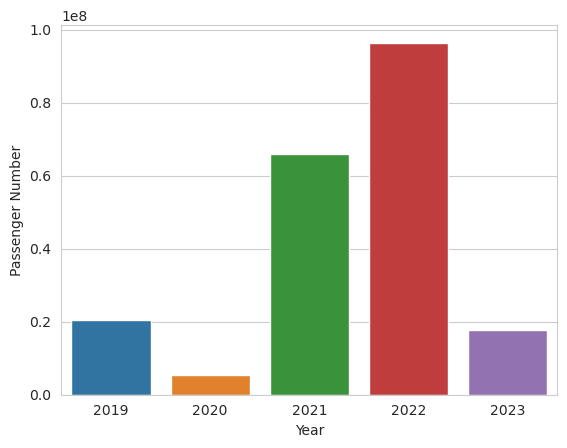

In [112]:
sns.barplot(data=df_yearly, x='year', y='passengersNumber')
plt.xlabel('Year')
plt.ylabel('Passenger Number')
plt.show()

En 2022 il y'a eu un nombre récord de passager. Nous allons plus approfondir en allant dans les details

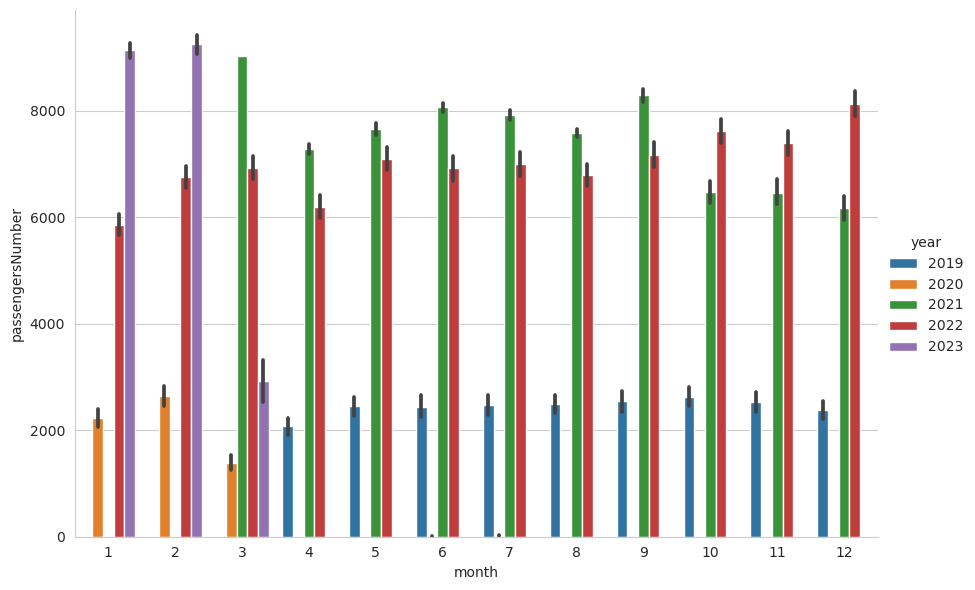

In [113]:
sns.catplot(x='month', y='passengersNumber', hue='year', data=df, kind='bar', height=6, aspect=1.5)

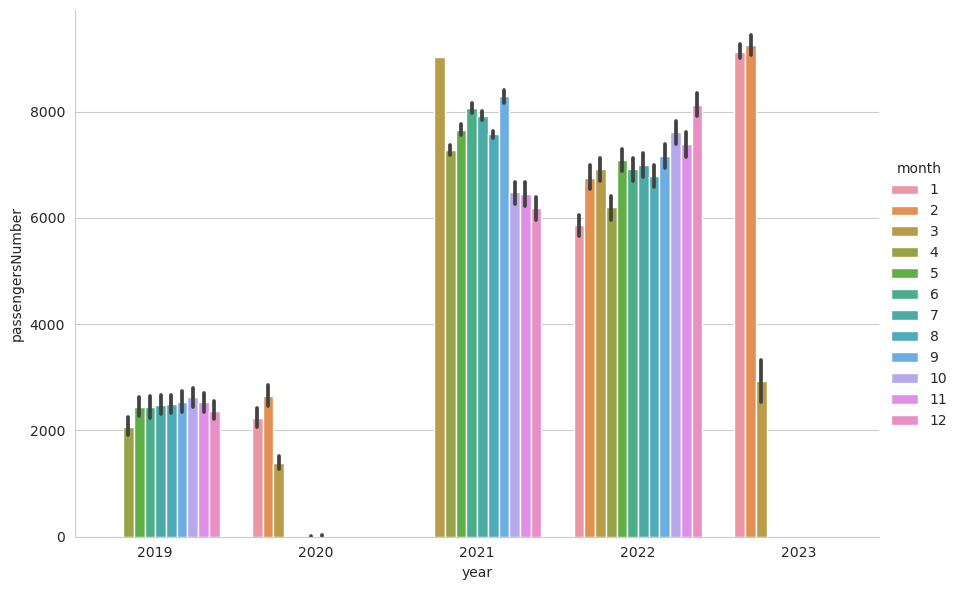

In [114]:
sns.catplot(x='year', y='passengersNumber', hue='month', data=df, kind='bar', height=6, aspect=1.5)

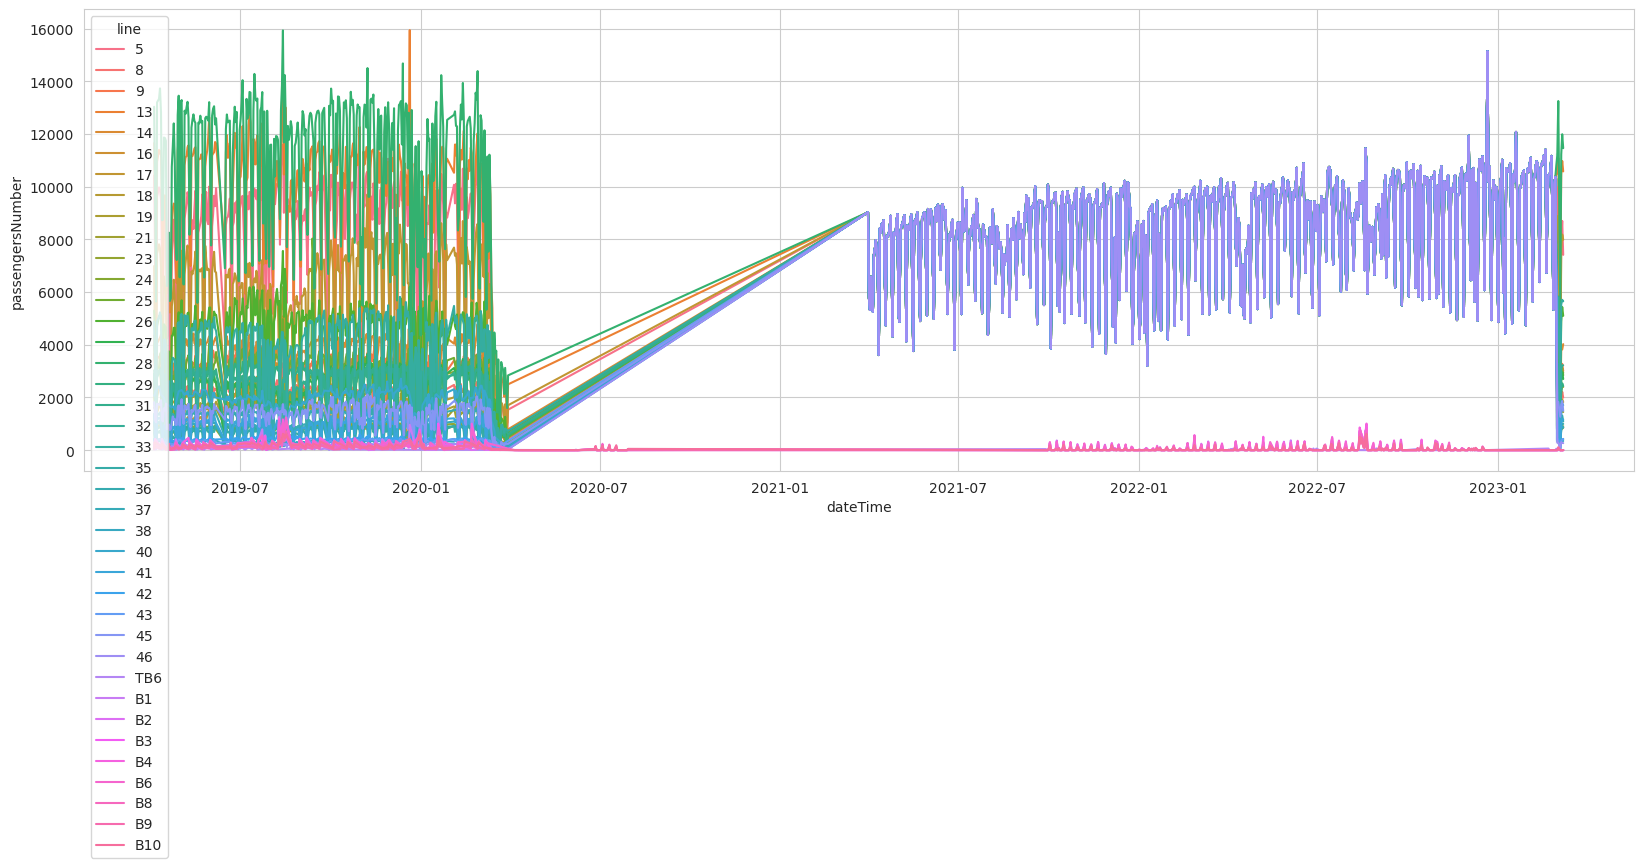

In [115]:
plt.figure(figsize=(20, 6))
sns.lineplot(data=df, x="dateTime", y="passengersNumber", hue="line")
plt.show()

In [116]:
df.set_index('dateTime', inplace=True)

In [117]:
df[df["year"]==2021]

,passengersNumber,line,lineType,month,day,year
dateTime,,,,,,
2021-11-02,9466.0,5,daily,11,2,2021
2021-12-17,10223.0,5,daily,12,17,2021
2021-12-08,4084.0,5,daily,12,8,2021
2021-12-21,10133.0,5,daily,12,21,2021
2021-12-16,9965.0,5,daily,12,16,2021
...,...,...,...,...,...,...
2021-12-27,0.0,B10,night,12,27,2021
2021-12-28,0.0,B10,night,12,28,2021
2021-12-29,0.0,B10,night,12,29,2021


In [118]:
# delete data from a specific date onwards
date_to_delete_from = '2020-03-28'
df = df[df.index < date_to_delete_from]

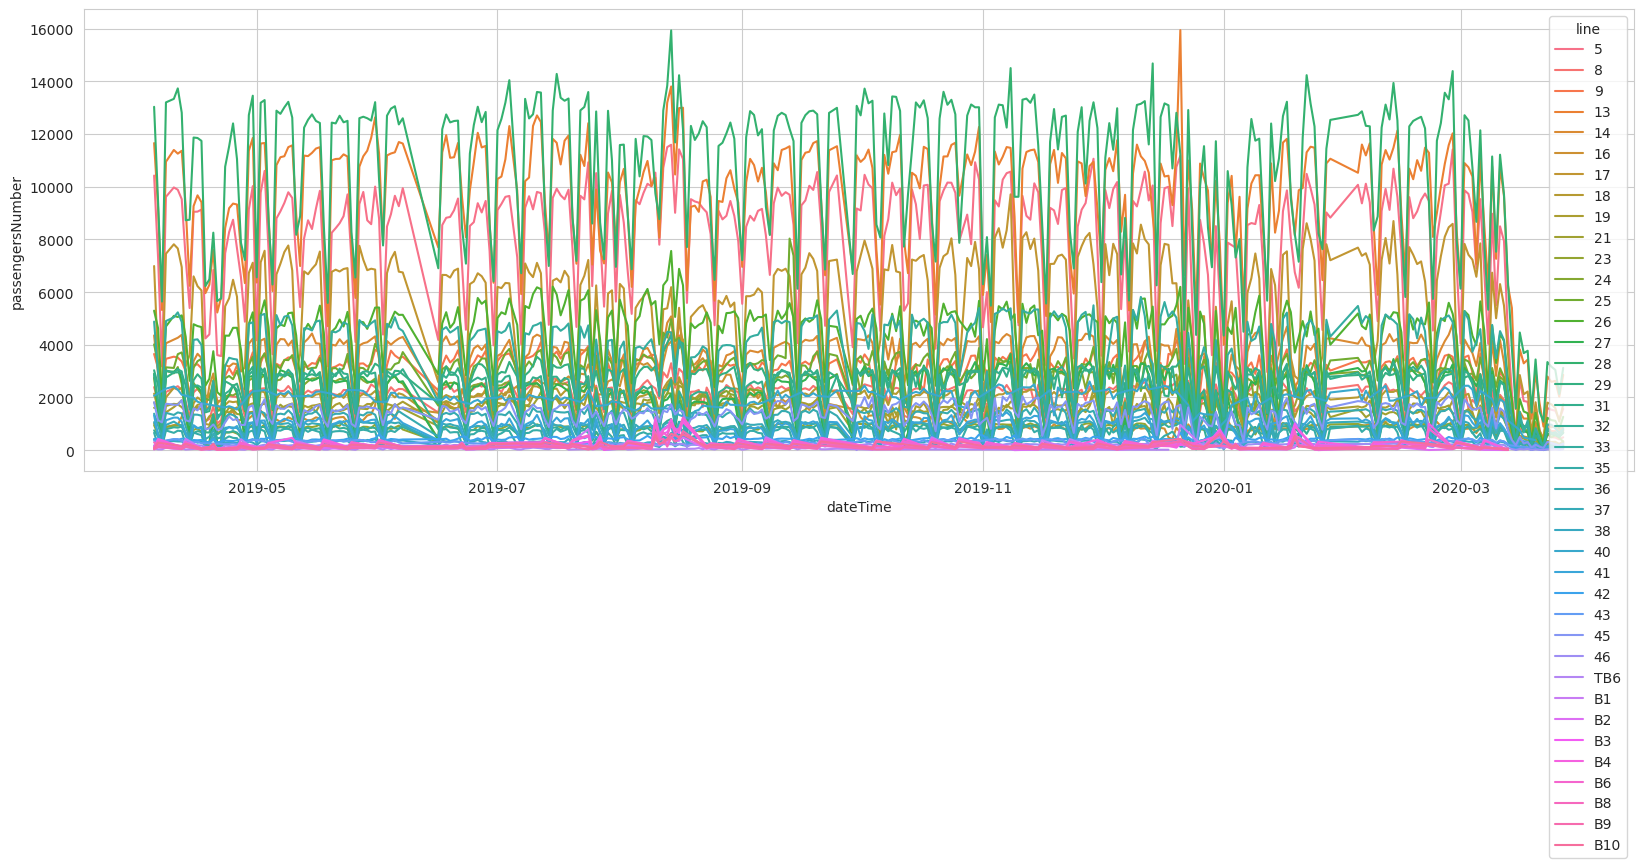

In [119]:
plt.figure(figsize=(20, 6))
sns.lineplot(data=df, x="dateTime", y="passengersNumber", hue="line")
plt.show()

In [120]:
df.tail()

,passengersNumber,line,lineType,month,day,year
dateTime,,,,,,
2020-03-06,95.0,B10,night,3,6,2020
2019-08-16,466.0,B10,night,8,16,2019
2019-09-21,330.0,B10,night,9,21,2019
2019-10-04,80.0,B10,night,10,4,2019
2019-12-21,430.0,B10,night,12,21,2019


D'après le graphe ci dessus, il y'a 

Predictions sans tenir compte des jours particuliers

In [121]:
y = df["passengersNumber"]
x=df.drop(columns=['passengersNumber'])

In [122]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
x["line"] = le.fit_transform(x["line"])
x["lineType"] = le.fit_transform(x["lineType"])

In [123]:
x.dtypes

line        int64
lineType    int64
month       int64
day         int64
year        int64
dtype: object

In [124]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression

In [125]:
X_train, X_test, y_train, y_test = train_test_split(x, y, test_size=0.33, random_state=42)

In [126]:
reg = LinearRegression().fit(X_train, y_train)

In [127]:
# Use the classifier to predict on the test data
y_pred = reg.predict(X_test)

In [128]:
from sklearn.metrics import mean_absolute_error
# calculate MAE
mae = mean_absolute_error(y_test, y_pred)

print('MAE:', mae)

MAE: 1766.2378324320428


Analyse Ajout de données extra

In [129]:
meteo = pd.read_csv("../input/donostiameteo-opinion/meteo_opinion.csv", sep=';', encoding='latin-1')
football = pd.read_csv("../input/donostia-football/DonostiaFootball.csv", encoding='latin-1')
ferie = pd.read_csv("../input/ferie-donostia/feriedonostia.csv", sep=';', encoding='latin-1')

In [130]:
meteo.head()

,DATE,OPINION
0,05/04/2019,meteo defavorable
1,06/04/2019,meteo correcte
2,07/04/2019,meteo correcte
3,08/04/2019,meteo defavorable
4,09/04/2019,meteo correcte


In [131]:
meteo.OPINION.value_counts()

meteo favorable           420
meteo defavorable         405
meteo correcte            332
meteo tres defavorable    183
meteo ideale               86
Name: OPINION, dtype: int64

In [132]:
meteo["OPINION"][meteo["OPINION"] =="meteo favorable"] = "favorable"
meteo["OPINION"][meteo["OPINION"] =="meteo defavorable"] = "defavorable"
meteo["OPINION"][meteo["OPINION"] =="meteo correcte"] = "correcte"
meteo["OPINION"][meteo["OPINION"] =="meteo tres defavorable"] = "tres_defavorable"
meteo["OPINION"][meteo["OPINION"] =="meteo ideale"] = "ideale"

In [133]:
meteo.dtypes

DATE       object
OPINION    object
dtype: object

In [134]:
meteo["DATE"] = pd.to_datetime(meteo["DATE"])

In [135]:
meteo = meteo.rename(columns={'DATE': 'dateTime', 'OPINION': 'meteo'})

In [136]:
display(meteo["dateTime"].dtypes)
meteo.head()

dtype('<M8[ns]')

,dateTime,meteo
0,2019-05-04,defavorable
1,2019-06-04,correcte
2,2019-07-04,correcte
3,2019-08-04,defavorable
4,2019-09-04,correcte


In [137]:
football.head()

,Date,Opponent,Attendance,Unnamed: 3
0,14/9/2019,Atlético Madrid,"34,719",NaN
1,26/9/2019,Alavés,"28,720",NaN
2,6/10/2019,Getafe,"30,153",NaN
3,20/10/2019,Real Betis,"28,032",NaN
4,30/10/2019,Levante,NaN,NaN


In [138]:
football["Date"] = pd.to_datetime(football["Date"])

In [139]:
football = football.rename(columns={'Date': 'dateTime'})

In [140]:
football["matchDay"] = True

In [141]:
football = football[["dateTime", "matchDay"]]

In [142]:
display(football["dateTime"].dtypes)
football.head()

dtype('<M8[ns]')

,dateTime,matchDay
0,2019-09-14,True
1,2019-09-26,True
2,2019-06-10,True
3,2019-10-20,True
4,2019-10-30,True


In [143]:
ferie.head()

,,,,autonome Gemeinschaft Baskenland - Ereignis- und Feiertage 2019
Datum,Tag,Feiertag,KW,Klasse
01.01.2019,Di,Nouvel an,1,1
06.01.2019,So,Epiphanie,1,1
31.03.2019,So,DÃ©but de l'heure d'Ã©tÃ©,13,5
18.04.2019,Do,Jeudi saint,16,1


In [144]:
ferie.reset_index(inplace=True)

In [145]:
ferie.head()

,level_0,level_1,level_2,level_3,autonome Gemeinschaft Baskenland - Ereignis- und Feiertage 2019
0,Datum,Tag,Feiertag,KW,Klasse
1,01.01.2019,Di,Nouvel an,1,1
2,06.01.2019,So,Epiphanie,1,1
3,31.03.2019,So,DÃ©but de l'heure d'Ã©tÃ©,13,5
4,18.04.2019,Do,Jeudi saint,16,1


In [146]:
ferie = ferie.rename(columns={'level_0': 'dateTime', 'level_2': 'evenement'})

In [147]:
ferie = ferie.drop(0)

In [148]:
ferie["dateTime"] = pd.to_datetime(ferie["dateTime"])

In [149]:
display(ferie["dateTime"].dtypes)
ferie.head()

dtype('<M8[ns]')

,dateTime,level_1,evenement,level_3,autonome Gemeinschaft Baskenland - Ereignis- und Feiertage 2019
1,2019-01-01,Di,Nouvel an,1,1
2,2019-06-01,So,Epiphanie,1,1
3,2019-03-31,So,DÃ©but de l'heure d'Ã©tÃ©,13,5
4,2019-04-18,Do,Jeudi saint,16,1
5,2019-04-19,Fr,Vendredi Saint,16,1


In [150]:
ferie = ferie[["dateTime", "evenement"]]

fusion des données

In [151]:
df_meteo = pd.merge(df, meteo, how="left",on="dateTime")

In [152]:
df_meteo.head()

,dateTime,passengersNumber,line,lineType,month,day,year,meteo
0,2019-05-01,4172.0,5,daily,5,1,2019,NaN
1,2019-04-06,7330.0,5,daily,4,6,2019,favorable
2,2019-04-05,10426.0,5,daily,4,5,2019,defavorable
3,2019-04-17,9134.0,5,daily,4,17,2019,favorable
4,2019-04-21,3608.0,5,daily,4,21,2019,correcte


In [153]:
len(df_meteo)

10881

In [154]:
df_meteo.meteo.value_counts()

correcte            2977
favorable           2524
defavorable         2147
tres_defavorable    1326
ideale              1146
Name: meteo, dtype: int64

In [155]:
data_1 = pd.merge(df_meteo, football, how="left",on="dateTime")

In [156]:
data_1.head()

,dateTime,passengersNumber,line,lineType,month,day,year,meteo,matchDay
0,2019-05-01,4172.0,5,daily,5,1,2019,NaN,NaN
1,2019-04-06,7330.0,5,daily,4,6,2019,favorable,NaN
2,2019-04-05,10426.0,5,daily,4,5,2019,defavorable,NaN
3,2019-04-17,9134.0,5,daily,4,17,2019,favorable,NaN
4,2019-04-21,3608.0,5,daily,4,21,2019,correcte,NaN


In [157]:
data_1[data_1.matchDay.isna()]

,dateTime,passengersNumber,line,lineType,month,day,year,meteo,matchDay
0,2019-05-01,4172.0,5,daily,5,1,2019,NaN,NaN
1,2019-04-06,7330.0,5,daily,4,6,2019,favorable,NaN
2,2019-04-05,10426.0,5,daily,4,5,2019,defavorable,NaN
3,2019-04-17,9134.0,5,daily,4,17,2019,favorable,NaN
4,2019-04-21,3608.0,5,daily,4,21,2019,correcte,NaN
...,...,...,...,...,...,...,...,...,...
10876,2020-03-06,95.0,B10,night,3,6,2020,correcte,NaN
10877,2019-08-16,466.0,B10,night,8,16,2019,ideale,NaN
10878,2019-09-21,330.0,B10,night,9,21,2019,ideale,NaN
10879,2019-10-04,80.0,B10,night,10,4,2019,correcte,NaN


In [158]:
data_1.matchDay.value_counts()

True    338
Name: matchDay, dtype: int64

In [159]:
data = pd.merge(data_1, ferie, how="left",on="dateTime")

In [160]:
data.head()

,dateTime,passengersNumber,line,lineType,month,day,year,meteo,matchDay,evenement
0,2019-05-01,4172.0,5,daily,5,1,2019,NaN,NaN,NaN
1,2019-04-06,7330.0,5,daily,4,6,2019,favorable,NaN,NaN
2,2019-04-05,10426.0,5,daily,4,5,2019,defavorable,NaN,NaN
3,2019-04-17,9134.0,5,daily,4,17,2019,favorable,NaN,NaN
4,2019-04-21,3608.0,5,daily,4,21,2019,correcte,NaN,PÃ¢ques


Analysons le nouveau dataframe

In [161]:
data.meteo.value_counts()

correcte            2977
favorable           2524
defavorable         2147
tres_defavorable    1326
ideale              1146
Name: meteo, dtype: int64

In [162]:
#sns.heatmap(data[['passengersNumber', 'matchDay']].corr(), annot=True);

In [163]:
data["evenement"].loc[data.evenement.isna()]="ras"

/opt/conda/lib/python3.7/site-packages/pandas/core/indexing.py:1732: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_single_block(indexer, value, name)


In [164]:
data["matchDay"][data.matchDay.isna()]=False

/opt/conda/lib/python3.7/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


In [165]:
import copy
copy_d = copy.deepcopy(data)

In [166]:
copy_d.head()

,dateTime,passengersNumber,line,lineType,month,day,year,meteo,matchDay,evenement
0,2019-05-01,4172.0,5,daily,5,1,2019,NaN,False,ras
1,2019-04-06,7330.0,5,daily,4,6,2019,favorable,False,ras
2,2019-04-05,10426.0,5,daily,4,5,2019,defavorable,False,ras
3,2019-04-17,9134.0,5,daily,4,17,2019,favorable,False,ras
4,2019-04-21,3608.0,5,daily,4,21,2019,correcte,False,PÃ¢ques


In [167]:
copy_d.dtypes

dateTime            datetime64[ns]
passengersNumber           float64
line                        object
lineType                    object
month                        int64
day                          int64
year                         int64
meteo                       object
matchDay                    object
evenement                   object
dtype: object

In [168]:
copy_d["meteo"][copy_d["meteo"].isna()]="ideale"

/opt/conda/lib/python3.7/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


In [169]:
copy_d["matchDay"].value_counts()

False    10543
True       338
Name: matchDay, dtype: int64

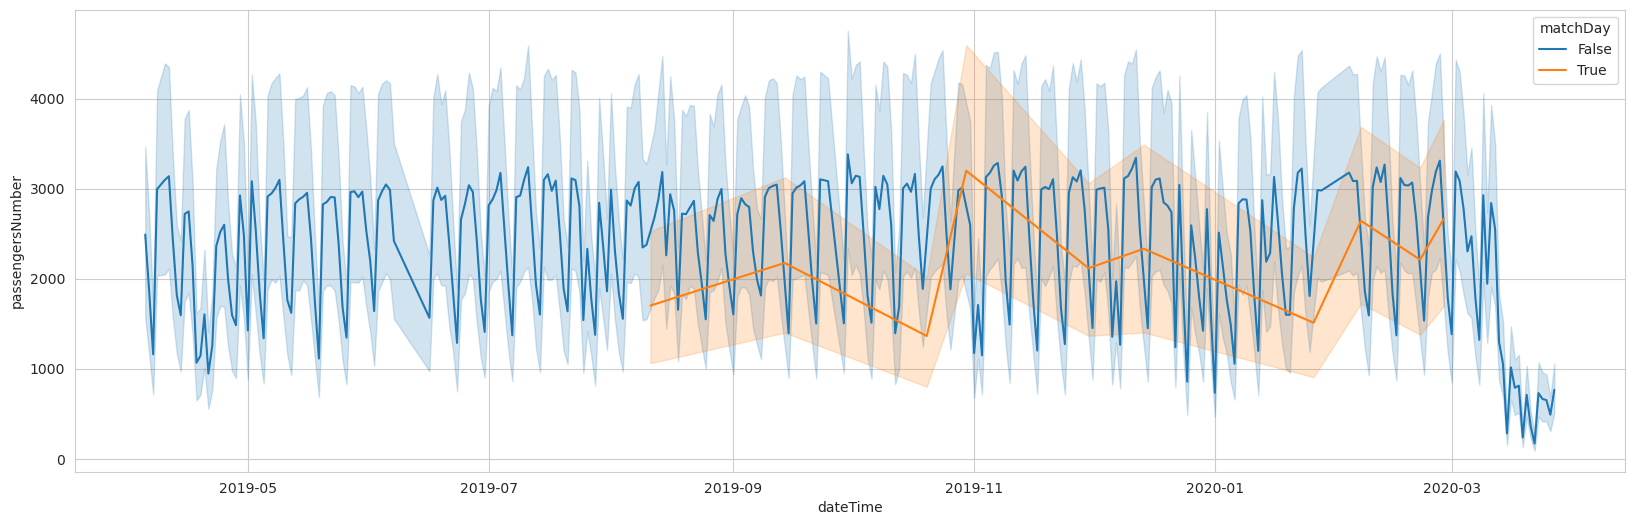

In [170]:
plt.figure(figsize=(20, 6))
sns.lineplot(data=copy_d, x="dateTime", y="passengersNumber", hue="matchDay")
plt.show()

In [171]:
copy_d[copy_d.evenement.isna()]

,dateTime,passengersNumber,line,lineType,month,day,year,meteo,matchDay,evenement


In [172]:
copy_d.head()

,dateTime,passengersNumber,line,lineType,month,day,year,meteo,matchDay,evenement
0,2019-05-01,4172.0,5,daily,5,1,2019,ideale,False,ras
1,2019-04-06,7330.0,5,daily,4,6,2019,favorable,False,ras
2,2019-04-05,10426.0,5,daily,4,5,2019,defavorable,False,ras
3,2019-04-17,9134.0,5,daily,4,17,2019,favorable,False,ras
4,2019-04-21,3608.0,5,daily,4,21,2019,correcte,False,PÃ¢ques


In [173]:
copy_d.dateTime.dtypes

dtype('<M8[ns]')

Implémentation des modeles avec pipeline

1er modele ARIMA

In [174]:
df = copy.deepcopy(copy_d)

In [175]:
# Ajout d'une colonne pour le jour de la semaine
from datetime import datetime
df['weekday'] = df['dateTime'].apply(lambda x: datetime.strftime(x, '%A'))

In [176]:
df.head()

,dateTime,passengersNumber,line,lineType,month,day,year,meteo,matchDay,evenement,weekday
0,2019-05-01,4172.0,5,daily,5,1,2019,ideale,False,ras,Wednesday
1,2019-04-06,7330.0,5,daily,4,6,2019,favorable,False,ras,Saturday
2,2019-04-05,10426.0,5,daily,4,5,2019,defavorable,False,ras,Friday
3,2019-04-17,9134.0,5,daily,4,17,2019,favorable,False,ras,Wednesday
4,2019-04-21,3608.0,5,daily,4,21,2019,correcte,False,PÃ¢ques,Sunday


In [177]:
from sklearn.preprocessing import OneHotEncoder

# assume df is your dataframe with the relevant columns
cat_cols = ['line', 'lineType', 'meteo', 'matchDay']
ohe = OneHotEncoder()

# fit_transform the encoder on the categorical columns
encoded_cols = pd.DataFrame(ohe.fit_transform(df[cat_cols]).toarray())

# assign column names to the one-hot-encoded columns
encoded_cols.columns = ohe.get_feature_names(cat_cols)

# drop the original categorical columns and concatenate the encoded columns
df = pd.concat([df.drop(cat_cols, axis=1), encoded_cols], axis=1)

/opt/conda/lib/python3.7/site-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function get_feature_names is deprecated; get_feature_names is deprecated in 1.0 and will be removed in 1.2. Please use get_feature_names_out instead.
  warnings.warn(msg, category=FutureWarning)


In [178]:
df['weekday'] = le.fit_transform(df['weekday'])
df['evenement'] = le.fit_transform(df['evenement'])

In [179]:
df.head()

,dateTime,passengersNumber,month,day,year,evenement,weekday,line_13,line_14,line_16,...,line_TB6,lineType_daily,lineType_night,meteo_correcte,meteo_defavorable,meteo_favorable,meteo_ideale,meteo_tres_defavorable,matchDay_False,matchDay_True
0,2019-05-01,4172.0,5,1,2019,14,6,0.0,0.0,0.0,...,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0
1,2019-04-06,7330.0,4,6,2019,14,2,0.0,0.0,0.0,...,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0
2,2019-04-05,10426.0,4,5,2019,14,0,0.0,0.0,0.0,...,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0
3,2019-04-17,9134.0,4,17,2019,14,6,0.0,0.0,0.0,...,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0
4,2019-04-21,3608.0,4,21,2019,9,3,0.0,0.0,0.0,...,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0


In [181]:
y = df['passengersNumber'].values.reshape(-1, 1)

In [182]:
x = df.drop(columns=["passengersNumber", "dateTime"])

In [183]:
x

,month,day,year,evenement,weekday,line_13,line_14,line_16,line_17,line_18,...,line_TB6,lineType_daily,lineType_night,meteo_correcte,meteo_defavorable,meteo_favorable,meteo_ideale,meteo_tres_defavorable,matchDay_False,matchDay_True
0,5,1,2019,14,6,0.0,0.0,0.0,0.0,0.0,...,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0
1,4,6,2019,14,2,0.0,0.0,0.0,0.0,0.0,...,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0
2,4,5,2019,14,0,0.0,0.0,0.0,0.0,0.0,...,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0
3,4,17,2019,14,6,0.0,0.0,0.0,0.0,0.0,...,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0
4,4,21,2019,9,3,0.0,0.0,0.0,0.0,0.0,...,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10876,3,6,2020,14,0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0
10877,8,16,2019,14,0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0
10878,9,21,2019,14,2,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0
10879,10,4,2019,14,0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0


In [227]:
y_log=np.log(y)
y_log = np.where(np.isfinite(y_log), y_log, 0)

In [228]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(x, y, test_size=0.25, random_state=42)

In [196]:
X_train.shape

(8160, 53)

In [229]:
import tensorflow as tf
from tensorflow.keras import layers, models
model = models.Sequential([
    layers.Dense(64, activation='relu', input_shape=(53,)),
    layers.Dense(64, activation='relu'),
    layers.Dense(1)
])

In [230]:
# Compilation du modèle
model.compile(optimizer='adam', loss='mse', metrics=['mae'])

In [231]:
# Entraînement du modèle
history = model.fit(X_train, y_train, epochs=100, batch_size=32, validation_split=0.2)

Epoch 1/100
204/204 [==============================] - 1s 4ms/step - loss: 8384358.5000 - mae: 1934.8580 - val_loss: 8083775.5000 - val_mae: 2002.9908
Epoch 2/100
204/204 [==============================] - 1s 3ms/step - loss: 7786217.0000 - mae: 1944.9398 - val_loss: 8099468.0000 - val_mae: 1929.8512
Epoch 3/100
204/204 [==============================] - 1s 4ms/step - loss: 7804960.0000 - mae: 1940.8767 - val_loss: 8071138.0000 - val_mae: 1982.9803
Epoch 4/100
204/204 [==============================] - 1s 4ms/step - loss: 7767728.5000 - mae: 1941.7590 - val_loss: 8069156.0000 - val_mae: 1961.4902
Epoch 5/100
204/204 [==============================] - 1s 3ms/step - loss: 7768554.0000 - mae: 1930.5361 - val_loss: 8090744.0000 - val_mae: 2043.4891
Epoch 6/100
204/204 [==============================] - 1s 3ms/step - loss: 7764624.5000 - mae: 1942.0054 - val_loss: 8055918.5000 - val_mae: 1977.7418
Epoch 7/100
204/204 [==============================] - 1s 4ms/step - loss: 7769146.5000 - mae:

In [209]:
# Évaluation du modèle sur les données de test
mse, mae = model.evaluate(X_test, y_test)

86/86 [==============================] - 0s 3ms/step - loss: 1196223.3750 - mae: 663.4687 - accuracy: 0.0000e+00


ValueError: too many values to unpack (expected 2)

In [210]:
# Affichage des résultats
print('MSE:', mse)
print('MAE:', mae)

MSE: 1245500.75
MAE: 654.7665405273438


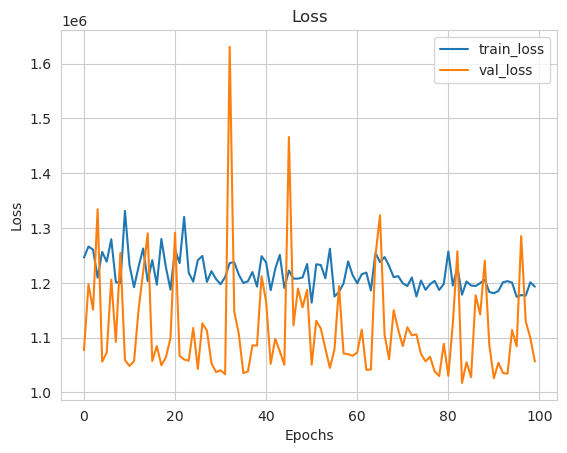

In [211]:
# Tracer la courbe de perte
plt.plot(history.history['loss'], label='train_loss')
plt.plot(history.history['val_loss'], label='val_loss')
plt.title('Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

In [217]:
# Convertir la colonne "dateTime" en index
df.set_index('dateTime', inplace=True)

In [224]:
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import cross_val_score
from sklearn.metrics import mean_squared_error
import math
# charger vos données et les séparer en caractéristiques (X) et cibles (y)

# initialiser la régression linéaire
reg = LinearRegression()

# effectuer une validation croisée avec 5 partitions et calculer l'erreur moyenne quadratique (MSE)
mse_scores = -cross_val_score(reg, X_train, y_log, cv=5, scoring='neg_mean_squared_error')
print(f"MSE scores: {mse_scores}")

# calculer la moyenne de l'erreur moyenne quadratique
mean_mse = np.mean(mse_scores)
mean_rmse=math.sqrt(mean_mse)
print(f"Mean MSE: {mean_mse}, Mean RMSE:{mean_rmse}")

MSE scores: [0.29746963 0.30152855 0.29680571 0.34357175 0.33781526]
Mean MSE: 0.3154381796061268, Mean RMSE:0.5616388337767669


In [236]:
import [xgboost] as xgb
from sklearn.linear_model import Lasso
from sklearn.model_selection import GridSearchCV


# Initialiser le modèle Lasso
lasso = Lasso(alpha=100, max_iter=1000)

# Initialiser le modèle XGBoost pour la régression
xgb_model = xgb.XGBRegressor()

# Définir la grille des hyperparamètres à tester pour XGBoost
param_grid = {
    'n_estimators': [25, 50, 100],
    'max_depth': [5, 10, 20],
    'learning_rate': [0.01, 0.1, 0.5]
}

# Initialiser la recherche de grille avec validation croisée de 5 partitions
grid_search = GridSearchCV(xgb_model, param_grid, cv=5, scoring='neg_mean_squared_error')

# Entraîner la recherche de grille sur les données d'entraînement
grid_search.fit(X_train, y_train)

# Afficher les meilleurs hyperparamètres et la meilleure erreur MSE moyenne
print(f"Best parameters: {grid_search.best_params_}")
print(f"Best MSE: {-grid_search.best_score_}")

# Initialiser le modèle XGBoost avec les meilleurs hyperparamètres
xgb_best = xgb.XGBRegressor(**grid_search.best_params_)

# Entraîner le modèle XGBoost sur les données d'entraînement
xgb_best.fit(X_train, y_train)

# Faire des prédictions sur les données de test
y_pred = xgb_best.predict(X_test)

# Calculer l'erreur MSE du modèle
mse = mean_squared_error(y_test, y_pred)
print(f"MSE: {mse}")

Best parameters: {'learning_rate': 0.5, 'max_depth': 5, 'n_estimators': 100}
Best MSE: 325310.835955194
MSE: 298468.47817556316


In [240]:
to_predict = X_train[:3]

In [241]:
predicted = xgb_best.predict(to_predict)

In [244]:
predicted

array([1647.502 ,  512.7896, 5877.256 ], dtype=float32)

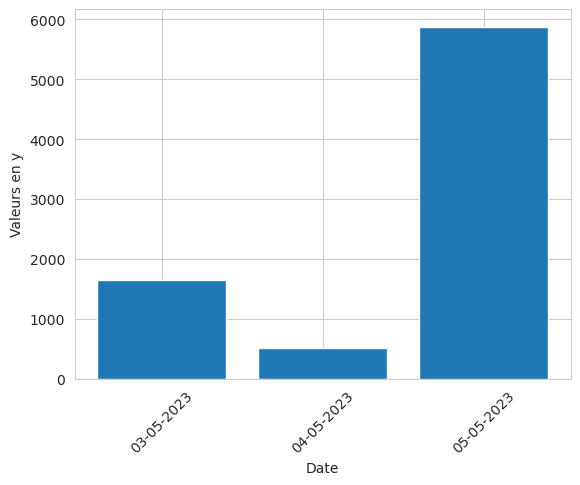

In [247]:
import matplotlib.pyplot as plt
import matplotlib.dates as mdates
import datetime

# Définir les données
y_values = predicted
x_values = ['03-05-2023','04-05-2023','05-05-2023']

# Convertir les chaînes de caractères en objets datetime
x_values = [datetime.datetime.strptime(date_str, '%d-%m-%Y') for date_str in x_values]

# Créer la figure et les axes
fig, ax = plt.subplots()

# Tracer le graphique en utilisant la méthode 'bar'
ax.bar(x_values, y_values, width=0.8, align='edge')

# Ajouter les étiquettes des axes
ax.set_xlabel('Date')
ax.set_ylabel('Valeurs en y')

# Formater les étiquettes de l'axe x
date_format = mdates.DateFormatter('%d-%m-%Y')
ax.xaxis.set_major_formatter(date_format)

# Spécifier les positions des marqueurs d'axe et les étiquettes correspondantes
bar_width = 0.8
xticks = [date + datetime.timedelta(days=bar_width/2) for date in x_values] # Ajouter la moitié de la largeur des barres aux positions des marqueurs d'axe
xticklabels = [date.strftime('%d-%m-%Y') for date in x_values] # Utiliser les valeurs x d'origine pour générer les étiquettes
ax.set_xticks(xticks)
ax.set_xticklabels(xticklabels)

# Faire pivoter les étiquettes de l'axe x pour une meilleure lisibilité
ax.tick_params(axis='x', rotation=45)

# Afficher le graphique
plt.show()